<a href="https://colab.research.google.com/github/nexustech101/colab-notebooks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as skl_mse, r2_score as skl_r2, mean_absolute_error as skl_mae

class LinearRegression:
    """Custom implementation of linear regression."""
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, x, y, animate=False):
        """Fit the model to the training data with optional animation."""
        n_samples, n_features = x.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iters):
            y_predicted = np.dot(x, self.weights) + self.bias
            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(x.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        # Check for NaN values in weights and bias
        if np.any(np.isnan(self.weights)) or np.any(np.isnan(self.bias)):
            raise ValueError("Weights or bias contain NaNs after fitting")

    def predict(self, x):
        """Predict using the trained model."""
        y_predicted = np.dot(x, self.weights) + self.bias
        return y_predicted

    def print_weights(self):
        """Print the learned weights."""
        print("Learned Weights:", self.weights)
        print("Learned Bias:", self.bias)

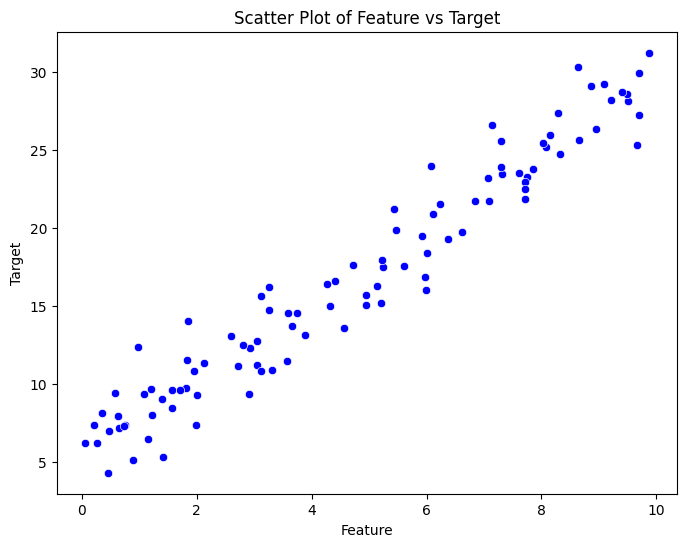

In [2]:
# Generate sample data with one feature
np.random.seed(42)

n_samples = 100
X = np.random.rand(n_samples, 1) * 10  # One feature with values between 0 and 10
true_weight = 2.5
true_bias = 5.0
noise = np.random.randn(n_samples) * 2

# Linear relationship
y = X.flatten() * true_weight + true_bias + noise

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Feature'])
df['Target'] = y

# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature', y='Target', data=df, color='blue')
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with animation
model = LinearRegression(lr=0.001, n_iters=5000)  # Adjusted learning rate
model.fit(X_train_scaled, y_train, animate=True)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Print learned weights and bias
model.print_weights()

# Print metrics
print("")
print(f"Model weight: {np.log2(round(model.weights[0], 2))}")
print(f"Actual weight: {true_weight}")
print(f"Model bias: {np.log2(round(model.bias, 2))}")
print(f"Actual bias: {true_bias}")
print("")

print("Mean Squared Error:", skl_mse(y_test, y_pred))
print("R^2 Score:", skl_r2(y_test, y_pred))
print("Mean Absolute Error:", skl_mae(y_test, y_pred))

Learned Weights: [6.9997005]
Learned Bias: 16.500890673998054

Model weight: 2.807354922057604
Actual weight: 2.5
Model bias: 4.044394119358453
Actual bias: 5.0

Mean Squared Error: 2.713763004999345
R^2 Score: 0.9528525292843886
Mean Absolute Error: 1.1935244168480952


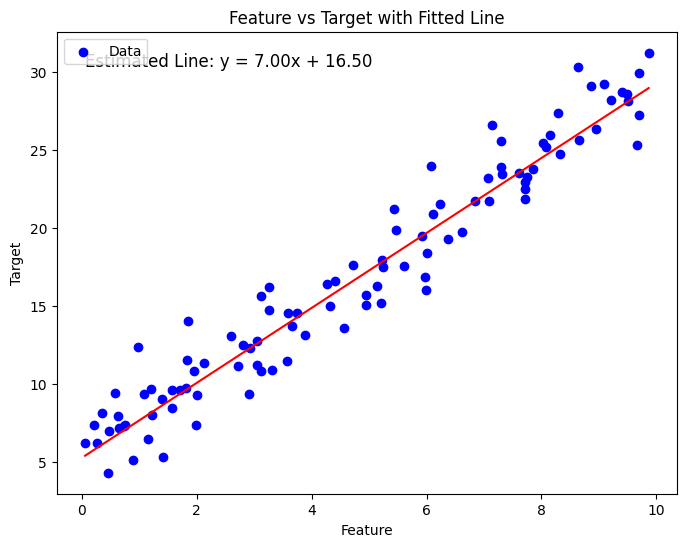

In [4]:
# Plot the data and the model's estimated line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')

# Generate the range of values for plotting the fitted line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Scale X_range using the scaler
X_range_scaled = scaler.transform(X_range)

# Predict using the model on the scaled range
y_fit1 = model.predict(X_range_scaled)
plt.plot(X_range, y_fit1, color='red')


# Render the estimated equation
slope = model.weights[0]
intercept = model.bias
equation = f'Estimated Line: y = {slope:.2f}x + {intercept:.2f}'

plt.text(X.min(), y.max(), equation, fontsize=12, verticalalignment='top', color='black')

plt.title('Feature vs Target with Fitted Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [ ]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))

# Impact Horizontal Distance
plt.subplot(1, 3, 1)
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], color='blue', alpha=0.7)
plt.xlabel('Actual Impact Horizontal Distance')
plt.ylabel('Predicted Impact Horizontal Distance')
plt.title('Impact Horizontal Distance')

# Impact Vertical Distance
plt.subplot(1, 3, 2)
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1], color='green', alpha=0.7)
plt.xlabel('Actual Impact Vertical Distance')
plt.ylabel('Predicted Impact Vertical Distance')
plt.title('Impact Vertical Distance')

# Time of Flight
plt.subplot(1, 3, 3)
plt.scatter(y_test.iloc[:, 2], y_pred[:, 2], color='red', alpha=0.7)
plt.xlabel('Actual Time of Flight')
plt.ylabel('Predicted Time of Flight')
plt.title('Time of Flight')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def mse(x, y, n_iters=500, lr=0.001):
    """
    Linear Regression using Mean Squared Error (MSE) as cost function.

    Parameters:
    - x: Input features, shape (n_samples, n_features)
    - y: Target values, shape (n_samples,)
    - n_iters: Number of iterations for gradient descent
    - lr: Learning rate for gradient descent

    Returns:
    - predict: A function to make predictions on new data
    - weights: The learned weights
    - bias: The learned bias
    """
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iters):
        # Predicted values
        y_predicted = np.dot(x, weights) + bias

        # Compute gradients
        error = y_predicted - y
        dw = (1 / n_samples) * np.dot(x.T, error)
        db = (1 / n_samples) * np.sum(error)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    def predict(new_x):
        return np.dot(new_x, weights) + bias

    return predict, weights, bias


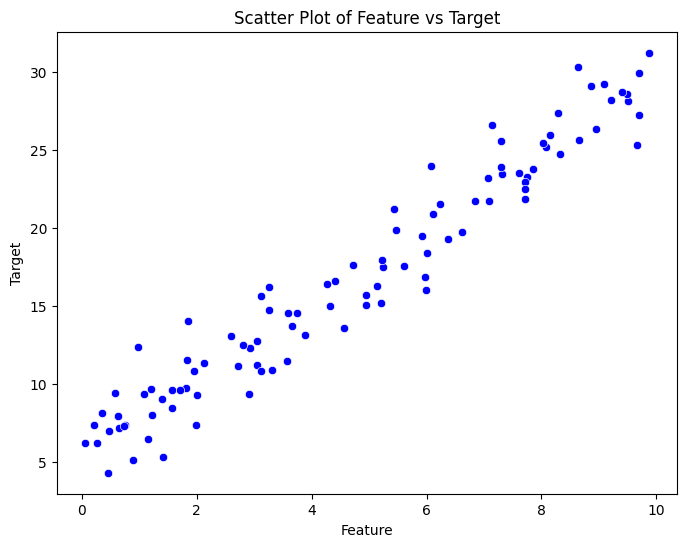

In [ ]:
# Generate sample data with one feature
np.random.seed(42)

n_samples = 100
X = np.random.rand(n_samples, 1) * 10  # One feature with values between 0 and 10
true_weight = 2.5
true_bias = 5.0
noise = np.random.randn(n_samples) * 2

# Linear relationship
y = X.flatten() * true_weight + true_bias + noise

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Feature'])
df['Target'] = y


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature', y='Target', data=df, color='blue')
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [ ]:
# Fit the model
predict, weights, bias = mse(X, y, n_iters=1000, lr=0.01)

# Print learned parameters
print("Learned Weights:", weights)
print("Learned Bias:", bias)

# Test prediction
new_x = np.array([[6], [7]])
print("Predictions:", predict(new_x))


Learned Weights: [2.45531037]
Learned Bias: 5.122674147874305
Predictions: [19.85453639 22.30984677]
